In [11]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import json
import numpy as np
import geopandas as gpd
import tqdm.auto as tqdm
import pandas as pd
from permacache import stable_hash
import matplotlib.pyplot as plt
import collections
from urbanstats.geometry.shapefiles.shapefiles_list import shapefiles
from urbanstats.geometry.relationship import full_relationships
from urbanstats.special_cases.country import subnational_regions
from urbanstats.data.circle import overlapping_circles_fast
from urbanstats.website_data.table import (
    shapefile_without_ordinals,
    compute_statistics_for_shapefile,
)
from urbanstats.ordinals.compress_counts import (
    uncompress_counts_sequence,
    compress_counts_sequence,
)
from urbanstats.statistics.output_statistics_metadata import internal_statistic_names
from urbanstats.universe.universe_list import all_universes, default_universes
from urbanstats.geometry.relationship import ordering_idx as type_ordering_idx
from urbanstats.games.quiz_analysis import plot_sampling_bias
from urbanstats.games.quiz_sampling import (
    compute_quiz_question_distribution,
    compute_geographies_by_type,
    sample_quiz,
    produce_quiz_question_weights,
)
from urbanstats.games.quiz import finish_quiz

import gzip, base64, requests, urllib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [2]:
from urbanstats.statistics.statistics_tree import statistics_tree

In [3]:
data, qqp, ps = compute_quiz_question_distribution()

computing statistics:   0%|          | 0/40 [00:00<?, ?it/s]

0 6.6419148445129395
10 0.7786141633987427
20 0.5206846594810486
30 0.43161338567733765
40 0.38103818893432617
50 0.359136164188385
60 0.3454146981239319
70 0.34096652269363403
80 0.33876755833625793


In [4]:
def short_url(quiz, name):
    compressed = gzip.compress(
        json.dumps(dict(name=name, questions=quiz)).encode("utf-8"),
        mtime=0,
    )
    custom = base64.b64encode(compressed).decode("utf-8")
    after_slash = "quiz.html#mode=custom&quizContent=" + urllib.parse.quote_plus(custom)
    s = requests.post(
        "https://persistent.urbanstats.org/shorten", dict(full_text=after_slash)
    ).json()["shortened"]
    return "https://s.urbanstats.org/s?c=" + s

In [5]:
import string

In [13]:
def custom_quiz(x):
    fq = [
        {**q, "kind": "juxtastat"}
        for q in finish_quiz(sample_quiz(np.random.RandomState(x)))
    ]
    return fq

In [12]:
version = 3
for seed in range(10):
    name = f"{string.ascii_uppercase[seed]} v{version}"
    print(name, "::", short_url(custom_quiz(seed + (version - 1) * 10), name))

computing statistics:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz_question_distribution.py:62: RuntimeWarning: divide by zero encountered in divide
  np.abs(vals_a - vals_b) / np.minimum(np.abs(vals_a), np.abs(vals_b)) * 100
/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz_question_distribution.py:62: RuntimeWarning: invalid value encountered in divide
  np.abs(vals_a - vals_b) / np.minimum(np.abs(vals_a), np.abs(vals_b)) * 100
/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz_question_distribution.py:65: RuntimeWarning: divide by zero encountered in divide
  adj_pct_diff = raw_pct_diff / compute_difficulty_multipliers(qt)
/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz_question_distribution.py:65: RuntimeWarning: invalid value encountered in divide
  adj_pct_diff = raw_pct_diff / compute_difficulty_multipliers(qt)


AttributeError: 'QuizQuestionSkip' object has no attribute 'collection'

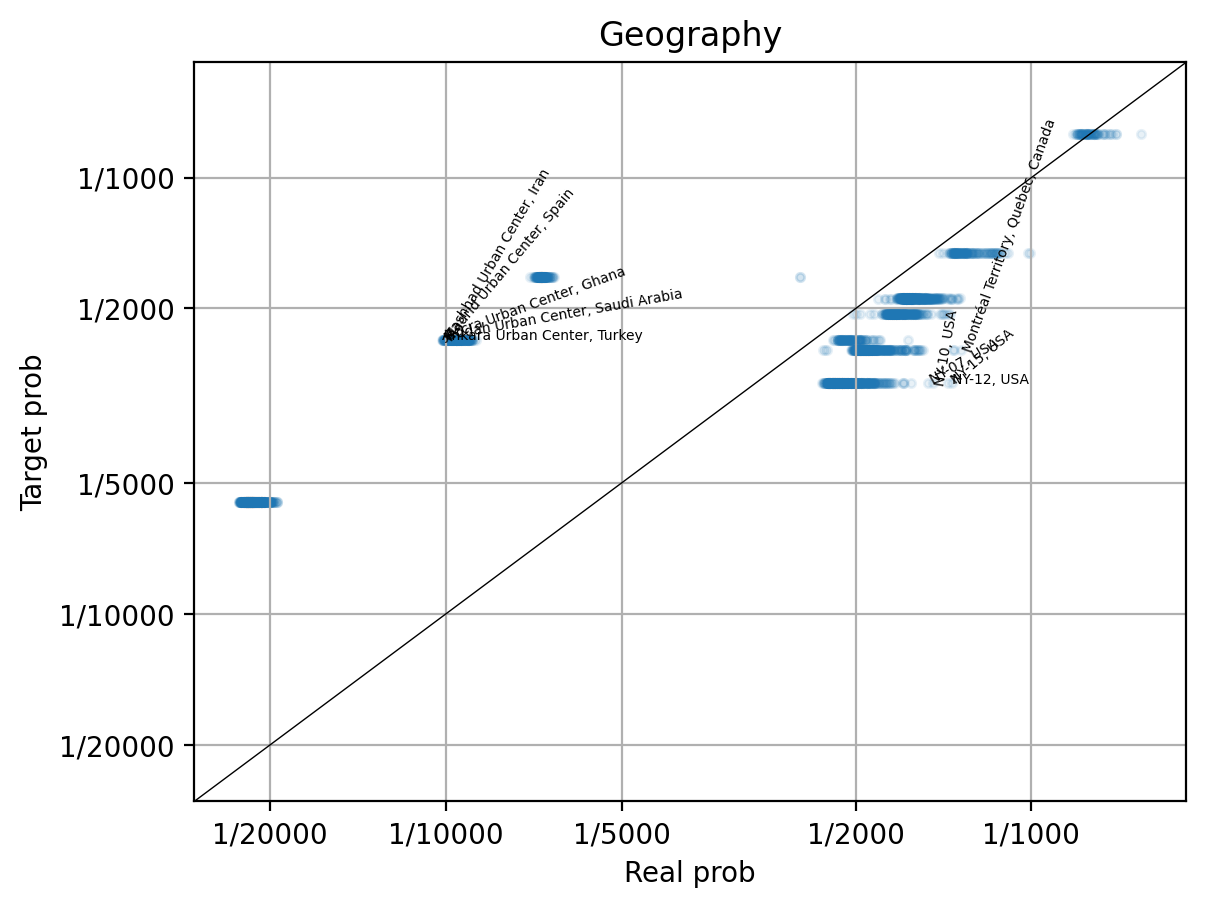

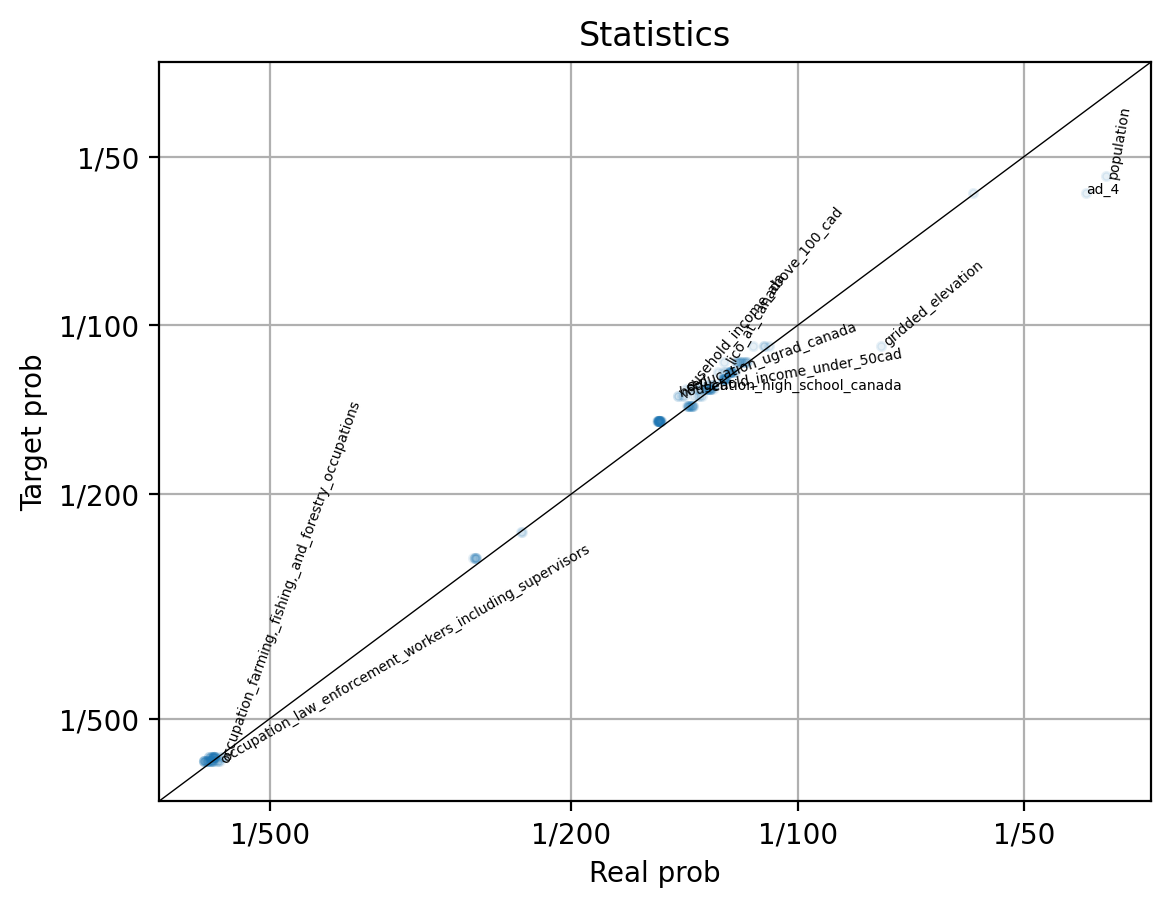

In [7]:
plot_sampling_bias(produce_quiz_question_weights(compute_geographies_by_type()))